# Case Studides in Artificial Intelligence and Machine Learning
# Assignment - 4
## Ayush Nikulkumar Patel(9033358)  



### Environment Setup

Prerequisites

Ensure you have Python installed (>= 3.7)
Install Required Packages

Run the following command:

pip install pandas numpy matplotlib seaborn scikit-learn
Dataset Setup

Dataset link

 First dataset from:https://www.kaggle.com/datasets/muhammetgamal5/noshowappointmentskagglev2may2016csv  

 Second dataset from: https://www.kaggle.com/datasets/joniarroba/noshowappointments


### Import libraries and Load Dataset

In [1]:
# Step 1: Setup and Load Datasets

# Install required libraries
!pip install pandas matplotlib seaborn scipy faker

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets using relative paths
noshow_df = pd.read_csv('/content/noshowappointments-kagglev2-may-2016.csv')
health_df = pd.read_csv('/content/healthcare_dataset.csv')

# Preview
print("No-show Dataset:")
print(noshow_df.head())

print("\nHealthcare Dataset:")
print(health_df.head())

No-show Dataset:
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0          

### EDA with Data Wrangling

In [2]:
# Step 2: Cleaning and Wrangling

# --- 2.1 Handle missing values (summary before cleaning)
print("Missing values (No-show Dataset):")
print(noshow_df.isnull().sum())

print("\nMissing values (Healthcare Dataset):")
print(health_df.isnull().sum())

# --- 2.2 Convert date strings to datetime format
noshow_df['ScheduledDay'] = pd.to_datetime(noshow_df['ScheduledDay'], errors='coerce')
noshow_df['AppointmentDay'] = pd.to_datetime(noshow_df['AppointmentDay'], errors='coerce')
health_df['Booking_Date'] = pd.to_datetime(health_df['Booking_Date'], errors='coerce')
health_df['Appointment_Date'] = pd.to_datetime(health_df['Appointment_Date'], errors='coerce')

# --- 2.3 Normalize column names for clarity
noshow_df.rename(columns={
    'PatientId': 'Patient_ID',
    'No-show': 'No_Show',
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap'
}, inplace=True)

# --- 2.4 Standardize text values for merging (optional at this point)
noshow_df['Gender'] = noshow_df['Gender'].str.upper()
health_df['Gender'] = health_df['Gender'].str.upper()

# --- 2.5 Preview cleaned data
print("\nCleaned No-show Dataset:")
print(noshow_df.dtypes)

print("\nCleaned Healthcare Dataset:")
print(health_df.dtypes)

Missing values (No-show Dataset):
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Missing values (Healthcare Dataset):
Patient_ID                    0
Age                        5076
Gender                     4906
Insurance_Type             4991
Chronic_Disease            4967
Mental_Health_Status       5038
Employment_Status          5063
Education_Level           16256
Transportation_Access      4987
Distance_from_Facility     5017
Area_Type                  4984
Booking_Date                  0
Appointment_Date              0
Appointment_Outcome        4958
dtype: int64

Cleaned No-show Dataset:
Patient_ID                    float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, U

In [3]:
# Normalize gender values for consistency
noshow_df['Gender'] = noshow_df['Gender'].replace({'F': 'FEMALE', 'M': 'MALE'})
health_df['Gender'] = health_df['Gender'].str.upper()

noshow_df['Age'] = noshow_df['Age'].astype(int)
health_df['Age'] = health_df['Age'].fillna(-1).astype(int)

merged_df = pd.merge(
    noshow_df,
    health_df,
    on=['Gender', 'Age'],
    how='inner',
    suffixes=('_noshow', '_health')
)

merged_df.drop(columns=['Booking_Date', 'Appointment_Date', 'Neighbourhood', 'Appointment_Outcome'], inplace=True)

# Check new shape and sample
print(f" Merged dataset shape (fallback method): {merged_df.shape}")
display(merged_df.head())

 Merged dataset shape (fallback method): (14859344, 22)


,Patient_ID_noshow,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,...,No_Show,Patient_ID_health,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type
0,2.987250e+13,5642903,FEMALE,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,...,No,67158,Medicaid,True,False,Student,Advanced Degree,False,49.596259,Rural
1,2.987250e+13,5642903,FEMALE,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,...,No,94888,NaN,True,True,Retired,Advanced Degree,True,32.105324,Rural
2,2.987250e+13,5642903,FEMALE,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,...,No,32875,Private,NaN,True,Student,High School,True,14.001845,Urban
3,2.987250e+13,5642903,FEMALE,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,...,No,84183,Uninsured,NaN,False,Unemployed,College,False,4.426679,Urban
4,2.987250e+13,5642903,FEMALE,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,...,No,91300,Private,True,True,Student,NaN,False,40.379216,Rural


In [5]:
from faker import Faker
fake = Faker()

# --- Fill numeric with median
merged_df['Distance_from_Facility'].fillna(merged_df['Distance_from_Facility'].median(), inplace=True)

# --- Fill categorical with mode
for col in ['Education_Level', 'Employment_Status', 'Mental_Health_Status',
            'Transportation_Access', 'Area_Type', 'Chronic_Disease', 'Insurance_Type']:
    if merged_df[col].isnull().sum() > 0:
        mode_val = merged_df[col].mode()[0]
        merged_df[col].fillna(mode_val, inplace=True)


# --- Final check
print("\n Missing values after imputation:")
print(merged_df.isnull().sum().sort_values(ascending=False).head())

<ipython-input-5-e12a435b637e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Distance_from_Facility'].fillna(merged_df['Distance_from_Facility'].median(), inplace=True)



 Missing values after imputation:
Patient_ID_noshow    0
AppointmentID        0
Gender               0
ScheduledDay         0
AppointmentDay       0
dtype: int64


### Visualisation

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14859344 entries, 0 to 14859343
Data columns (total 22 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Patient_ID_noshow       float64            
 1   AppointmentID           int64              
 2   Gender                  object             
 3   ScheduledDay            datetime64[ns, UTC]
 4   AppointmentDay          datetime64[ns, UTC]
 5   Age                     int64              
 6   Scholarship             int64              
 7   Hypertension            int64              
 8   Diabetes                int64              
 9   Alcoholism              int64              
 10  Handicap                int64              
 11  SMS_received            int64              
 12  No_Show                 object             
 13  Patient_ID_health       int64              
 14  Insurance_Type          object             
 15  Chronic_Disease         bool     

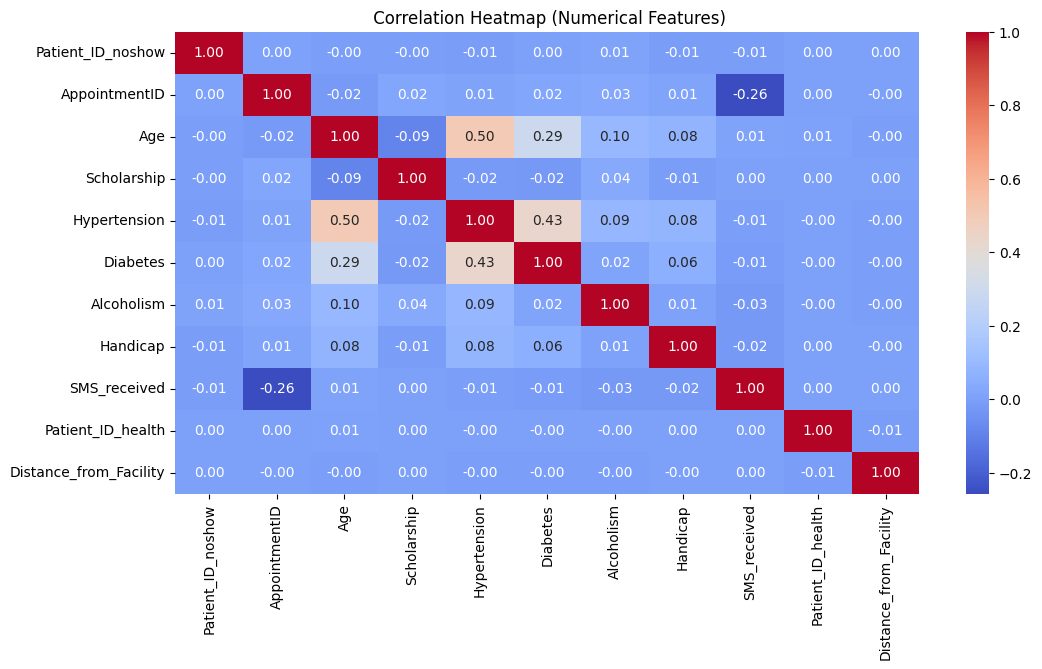

<ipython-input-7-04df3c45627f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='No_Show', palette='pastel')


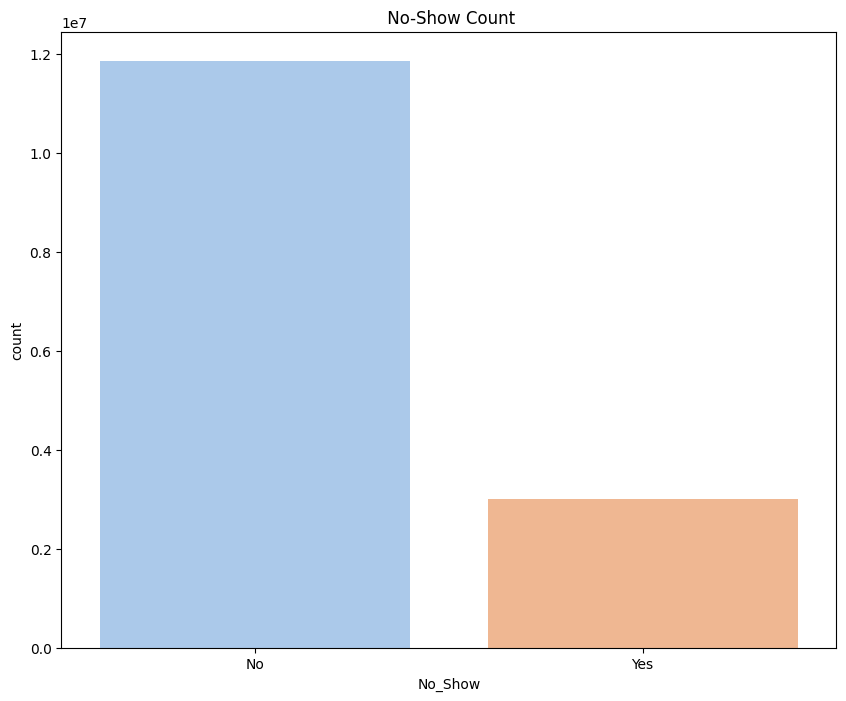

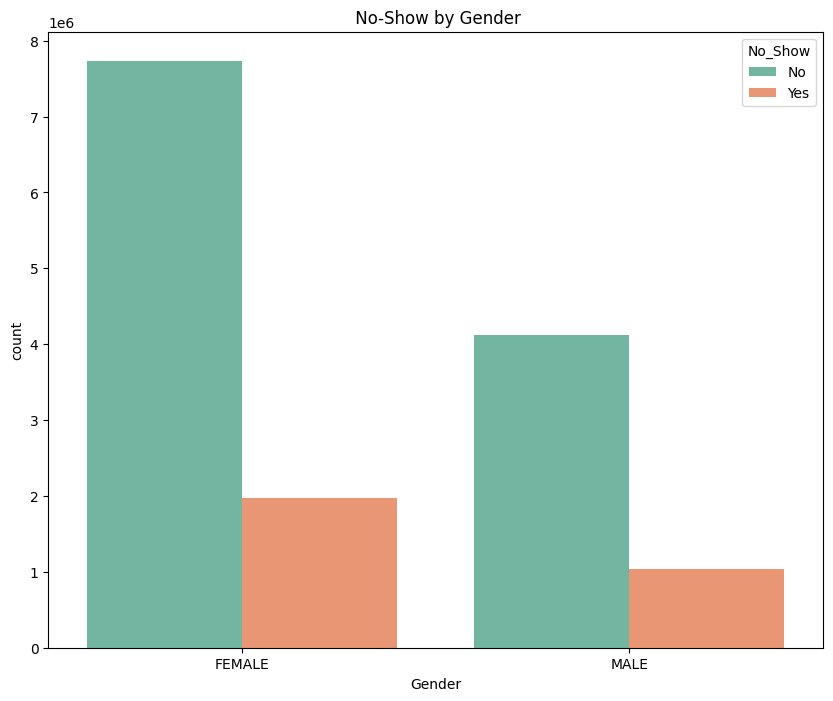

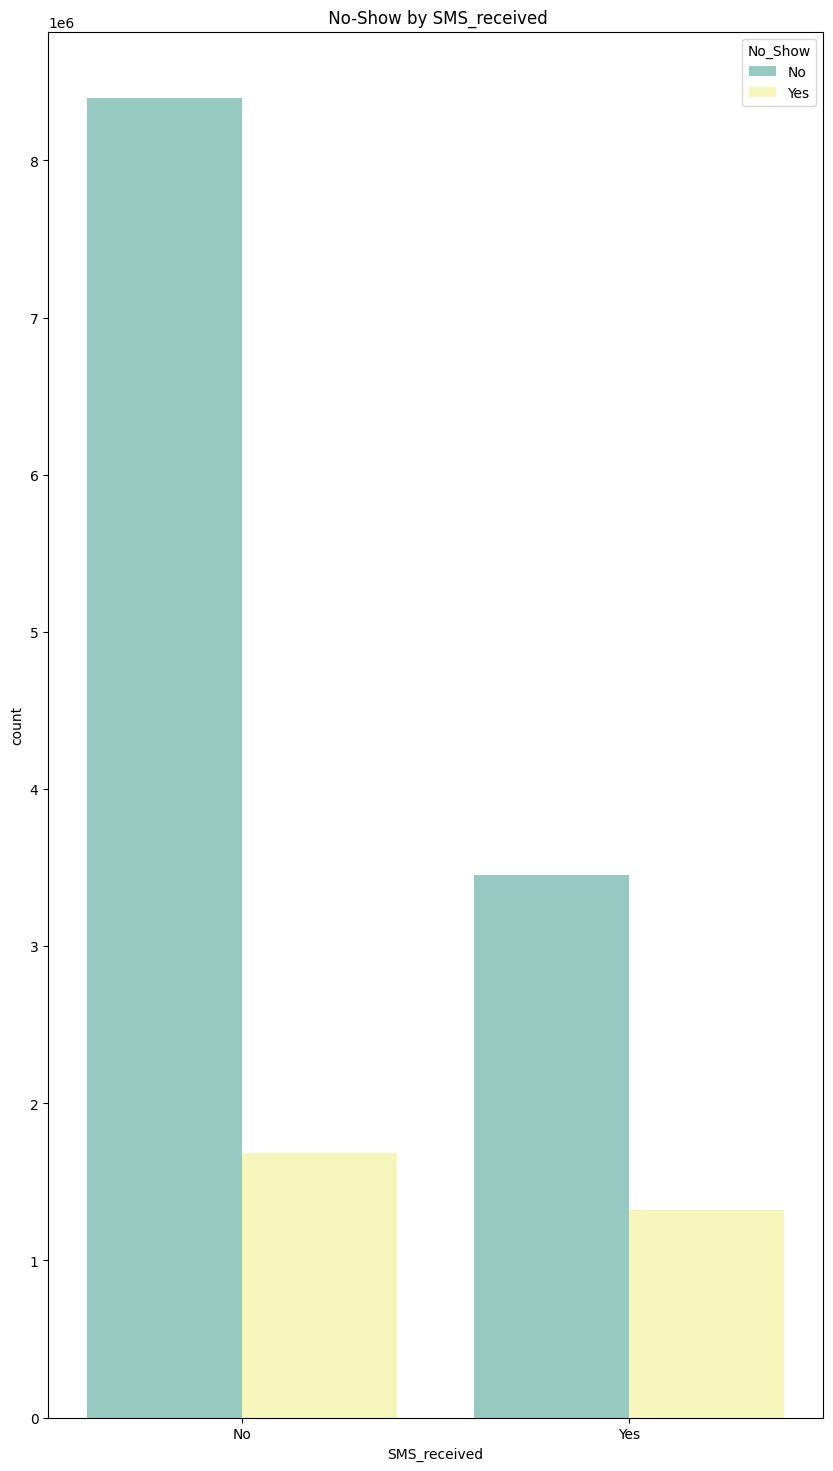

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 5.1 Basic Info
print("Dataset Info:")
print(merged_df.info())

print("\n Summary Statistics (Numerical):")
print(merged_df.describe(include=[np.number]))

print("\n Value Counts (No_Show):")
print(merged_df['No_Show'].value_counts())


# --- 5.2 Correlation Matrix (numerical features)
plt.figure(figsize=(12, 6))
sns.heatmap(merged_df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Correlation Heatmap (Numerical Features)")
plt.show()

# --- 5.3 Count plot for No_Show
plt.figure(figsize=(10, 8))
sns.countplot(data=merged_df, x='No_Show', palette='pastel')
plt.title(" No-Show Count")
plt.show()

# --- 5.4 No-Show by Gender
plt.figure(figsize=(10, 8))
sns.countplot(data=merged_df, x='Gender', hue='No_Show', palette='Set2')
plt.title(" No-Show by Gender")
plt.show()

# --- 5.5 No-Show by SMS_received
plt.figure(figsize=(10, 18))
sns.countplot(data=merged_df, x='SMS_received', hue='No_Show', palette='Set3')
plt.title(" No-Show by SMS_received")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [8]:
import os

# Create output directory if it doesn't exist
os.makedirs('./output', exist_ok=True)

# Save the merged dataset to CSV
merged_df.to_csv('./output/merged_cleaned.csv', index=False)

print(" Merged dataset saved to: ./output/merged_cleaned.csv")

 Merged dataset saved to: ./output/merged_cleaned.csv


### Chi-Square Test

In [12]:
from scipy.stats import chi2_contingency

# Create contingency table
chi_table = pd.crosstab(merged_df['SMS_received'], merged_df['No_Show'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(chi_table)

print(" Chi-Square Test — SMS_received vs No_Show")
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)

# Interpretation
if p < 0.05:
    print(" Significant relationship: Receiving an SMS is associated with no-show behavior.")
else:
    print(" No significant relationship: SMS and No-Show are independent.")

 Chi-Square Test — SMS_received vs No_Show
Chi-square statistic: 241942.22604382766
Degrees of freedom: 1
P-value: 0.0
 Significant relationship: Receiving an SMS is associated with no-show behavior.


### ANOVA (One-Way)

In [13]:
from scipy.stats import f_oneway

# Group distances by show/no-show
group_show = merged_df[merged_df['No_Show'] == 'No']['Distance_from_Facility']
group_noshow = merged_df[merged_df['No_Show'] == 'Yes']['Distance_from_Facility']

# Perform ANOVA
f_stat, p_val = f_oneway(group_show, group_noshow)

print("\n ANOVA Test — No_Show vs Distance_from_Facility")
print("F-statistic:", f_stat)
print("P-value:", p_val)

# Interpretation
if p_val < 0.05:
    print(" Significant difference: Distance from facility may impact no-show rates.")
else:
    print(" No significant difference: Distance likely does not affect show/no-show.")


 ANOVA Test — No_Show vs Distance_from_Facility
F-statistic: 3.094654069859446
P-value: 0.07854986623715106
 No significant difference: Distance likely does not affect show/no-show.


<ipython-input-14-201cb060d513>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='No_Show', y='Distance_from_Facility', palette='Set2')


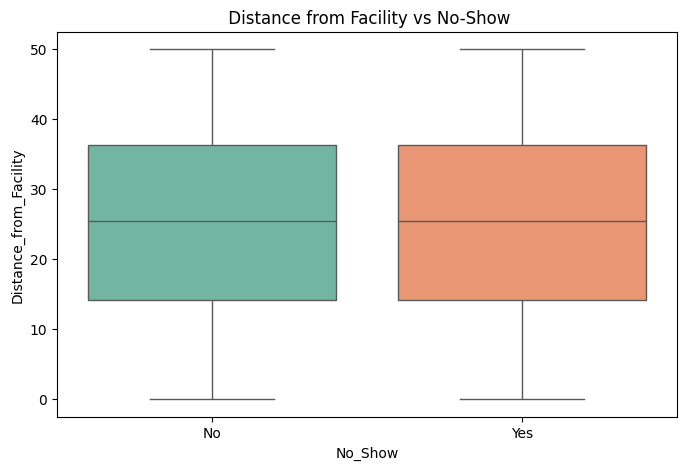

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='No_Show', y='Distance_from_Facility', palette='Set2')
plt.title(" Distance from Facility vs No-Show")
plt.show()

### Conclusion

This analysis explored factors influencing patient no-shows by merging two healthcare datasets. A Chi-Square test showed a significant association between receiving SMS reminders and appointment attendance, highlighting the effectiveness of digital reminders in reducing no-shows.

In contrast, a one-way ANOVA found no significant difference in travel distance between those who showed up and those who did not, suggesting that distance alone does not strongly impact attendance.

Overall, reminder systems appear to be a more impactful intervention than logistical factors like location.